In [1]:
import torch 
import numpy as np
from data import Datagen
from neuralNets import FeedForwardNet, SquaredNet
import crocoddyl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ffnet = torch.load("fnet.pth")
sqnet = torch.load("sqnet.pth")

In [3]:
data = Datagen()

In [4]:
positions = data.grid_data(size = 100)

In [5]:
values = []
for position in positions:
    ddp = data.solver_ddp(position)
    values.append([ddp.cost])
values = np.array(values)

In [6]:
ff_pred = ffnet(torch.tensor(positions, dtype = torch.float32)).detach().numpy()
sq_pred = sqnet(torch.tensor(positions, dtype = torch.float32)).detach().numpy()

In [7]:
error1 = values - ff_pred
error2 = values - sq_pred
error3 = ff_pred - sq_pred

<Figure size 432x288 with 0 Axes>

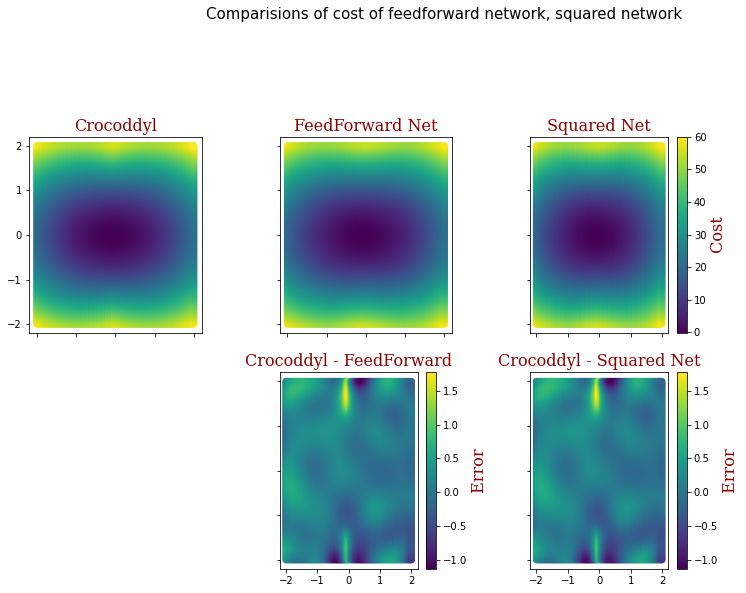

In [8]:
plt.clf()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Make the figure:

fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey =True)
fig.subplots_adjust(left=0.02, bottom=0.2, right=0.8, top= 0.8, wspace=0.45)
fig.suptitle(f'Comparisions of cost of feedforward network, squared network', fontsize = 15)
plt.yticks(np.arange(-2, 2.1, 1))
plt.xticks(np.arange(-2, 2.1, 1))

# Plot prediction, cost crocoddyl
im1 = axs[0, 0].scatter(x = positions[:,0], y = positions[:,1], c = values)
axs[0, 0].set_title("Crocoddyl", fontdict=font)


# Plot prediction, cost feedforward network
im2 = axs[0, 1].scatter(x = positions[:,0], y = positions[:,1], c = ff_pred)
axs[0, 1].set_title("FeedForward Net", fontdict=font)


# Plot prediction, cost squared network
im3 = axs[0, 2].scatter(x = positions[:,0], y = positions[:,1], c = sq_pred)
fig.colorbar(im3, ax=axs[0, 2]).set_label(" Cost ", fontdict=font)
axs[0, 2].set_title("Squared Net", fontdict=font)

axs[1, 0].axis('off')


# Plot error = crocoddyl -feedforward
im4 = axs[1, 1].scatter(x = positions[:,0], y = positions[:,1], c = error1)
axs[1, 1].set_title("Crocoddyl - FeedForward", fontdict=font)
fig.colorbar(im4, ax=axs[1, 1]).set_label(" Error ", fontdict=font)

# Plot error = crocoddyl -feedforward
im5 = axs[1, 2].scatter(x = positions[:,0], y = positions[:,1], c = error2)
axs[1, 2].set_title("Crocoddyl - Squared Net", fontdict=font)
fig.colorbar(im4, ax=axs[1, 2]).set_label(" Error ", fontdict=font)




